# SEST 2022
This notebook includes all figures for the paper submitted to the SEST2022 conference.

## Flexibility potential
Plot to visualise the potential to shift energy and the available power for different times of the week. Both are obtained by subtracting the minimum energy and power from the maximum energy and power respectively.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [10]:
# 2D heatmap with monthly-hourly resolution
def plot_hm_quarterly_percent(df_power, df_energy, v_max=None, filename=None, title=None, figsize=(6, 2.25)):

    
    fig, ax =  plt.subplots(1, 2, figsize=figsize)
    plt.subplots_adjust(bottom=0.3)
    v_min = 0
    v_max = None

    df = pd.DataFrame(df_power)

    df['quarter_of_day'] = df.index.hour * 4 + np.floor(df.index.minute/15)
    grouped = df.groupby([df.index.day, 'quarter_of_day']).sum().unstack()
    grouped.columns = ["{}:{}".format(int(d/4), (d%4)*15) for d in grouped.columns.get_level_values(1)]
    grouped.index = [calendar.day_name[m-1][0:3] for m in grouped.index]

    g = sns.heatmap(grouped, cmap='Reds', xticklabels=False, vmin=v_min, vmax=v_max, ax=ax[0],
                    cbar=True, linewidths=0)  
    g.set_xticks(np.arange(0, 97, 48))
    g.set_xticklabels(['00:00', '12:00', '00:00'])

    ax[0].title.set_text('Available power [%]')

    df = pd.DataFrame(df_energy)

    df['quarter_of_day'] = df.index.hour * 4 + np.floor(df.index.minute/15)
    grouped = df.groupby([df.index.day, 'quarter_of_day']).sum().unstack()
    grouped.columns = ["{}:{}".format(int(d/4), (d%4)*15) for d in grouped.columns.get_level_values(1)]
    grouped.index = [calendar.day_name[m-1] for m in grouped.index]

    g = sns.heatmap(grouped, cmap='Blues', xticklabels=False, vmin=v_min, vmax=v_max, ax=ax[1],
                    cbar=True, linewidths=0)  
    g.set_xticks(np.arange(0, 97, 48))
    g.set_xticklabels(['00:00', '12:00', '00:00'])
    g.set_yticks([])

    ax[1].title.set_text('Shiftable energy [%]')
    if title:
        fig.suptitle(title)
        
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

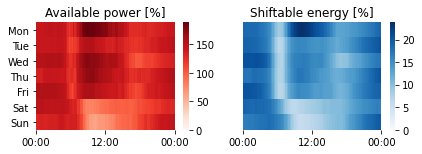

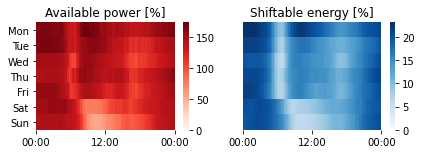

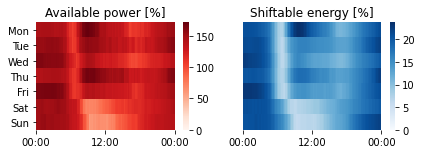

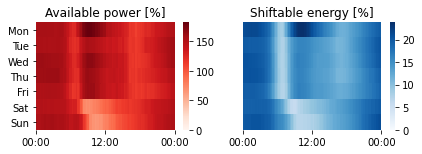

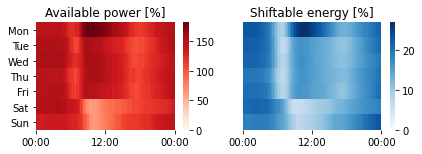

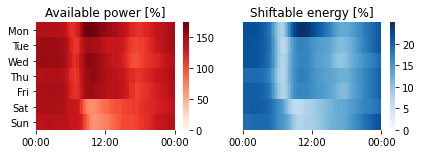

In [13]:
grid_ids = [1690, 1811, 1056, 176, 2534, 177]
band_dir = r'U:\Software\eDisGo_mirror'
for grid_id in grid_ids:
    timeseries_dir=r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\dumb\timeseries'.format(grid_id)
    overall_reference_charging = pd.read_csv(timeseries_dir+r'\charging_points_active_power.csv', index_col=0).sum(axis=1)
    peak_load = overall_reference_charging.max()
    energy_consumed = overall_reference_charging.sum()/2/4/7 # daily
    flexibility_bands_home = \
        pd.read_csv(band_dir+'/grid_data/ev_flexibility_bands_{}_home_00.csv'.format(grid_id), index_col=0,
                    dtype=np.float16)
    flexibility_bands_work = \
        pd.read_csv(band_dir+'/grid_data/ev_flexibility_bands_{}_work_00.csv'.format(grid_id), index_col=0,
                    dtype=np.float16)
    flexibility_bands = pd.concat([flexibility_bands_work, flexibility_bands_home],
                                  axis=1)
    flexibility_bands = \
        flexibility_bands.groupby(flexibility_bands.columns, axis=1).sum()
    #flexibility_bands.iloc[-29:].append(flexibility_bands.iloc[:-29])
    timeindex = pd.date_range('2029-01-01', '2029-01-08', freq='15min')
    bands = flexibility_bands.set_index(timeindex)
    columns_upper = [col for col in bands.columns if 'upper' in col]
    columns_lower = [col for col in bands.columns if 'lower' in col]
    columns_power = [col for col in bands.columns if 'power' in col]
    aggregated_bands = pd.DataFrame()
    aggregated_bands['upper'] = bands[columns_upper].sum(axis=1)
    aggregated_bands['lower'] = bands[columns_lower].sum(axis=1)
    aggregated_bands['power'] = bands[columns_power].sum(axis=1)
    #aggregated_bands.plot()
    df_power = aggregated_bands['power'].iloc[:-1]/peak_load*100
    df_energy = (aggregated_bands['upper'].iloc[:-1] - aggregated_bands['lower'].iloc[:-1])/energy_consumed*100
    plot_hm_quarterly_percent(df_power, df_energy)

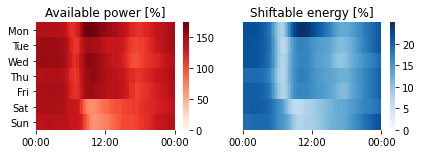

In [12]:
grid_ids = [177]
band_dir = r'U:\Software\eDisGo_mirror'
for grid_id in grid_ids:
    timeseries_dir=r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\dumb\timeseries'.format(grid_id)
    overall_reference_charging = pd.read_csv(timeseries_dir+r'\charging_points_active_power.csv', index_col=0).sum(axis=1)
    peak_load = overall_reference_charging.max()
    energy_consumed = overall_reference_charging.sum()/2/4/7 # daily
    flexibility_bands_home = \
        pd.read_csv(band_dir+'/grid_data/ev_flexibility_bands_{}_home_00.csv'.format(grid_id), index_col=0,
                    dtype=np.float16)
    flexibility_bands_work = \
        pd.read_csv(band_dir+'/grid_data/ev_flexibility_bands_{}_work_00.csv'.format(grid_id), index_col=0,
                    dtype=np.float16)
    flexibility_bands = pd.concat([flexibility_bands_work, flexibility_bands_home],
                                  axis=1)
    flexibility_bands = \
        flexibility_bands.groupby(flexibility_bands.columns, axis=1).sum()
    #flexibility_bands.iloc[-29:].append(flexibility_bands.iloc[:-29])
    timeindex = pd.date_range('2029-01-01', '2029-01-08', freq='15min')
    bands = flexibility_bands.set_index(timeindex)
    columns_upper = [col for col in bands.columns if 'upper' in col]
    columns_lower = [col for col in bands.columns if 'lower' in col]
    columns_power = [col for col in bands.columns if 'power' in col]
    aggregated_bands = pd.DataFrame()
    aggregated_bands['upper'] = bands[columns_upper].sum(axis=1)
    aggregated_bands['lower'] = bands[columns_lower].sum(axis=1)
    aggregated_bands['power'] = bands[columns_power].sum(axis=1)
    #aggregated_bands.plot()
    df_power = aggregated_bands['power'].iloc[:-1]/peak_load*100
    df_energy = (aggregated_bands['upper'].iloc[:-1] - aggregated_bands['lower'].iloc[:-1])/energy_consumed*100
    plot_hm_quarterly_percent(df_power, df_energy, filename='results/plots/flexibility_potential_percent.pdf')

## Charging patterns
Plots to visualise the course of charging for the different charging strategies.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
strategies = ['dumb', 'reduced', 'residual', 'optimised']
grid_ids = [1690, 1811, 1056, 176, 2534, 177]
peak_loads = pd.DataFrame(index=grid_ids, columns=strategies)
charging = {}
for grid_id in grid_ids:
    charging[grid_id] = {}
    cps = pd.read_csv(r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\dumb\topology\charging_points.csv'.format(grid_id))
    installed_capacity = cps.p_nom.sum()
    for strategy in strategies:
        timeseries_dir=r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\{}\timeseries'.format(grid_id, strategy)
        charging_tmp = pd.read_csv(timeseries_dir+'/charging_points_active_power.csv', index_col=0, parse_dates = True)
        charging_tmp_sum = pd.DataFrame() 
        charging_tmp_sum['charging'] = charging_tmp.sum(axis=1)
        charging_tmp_sum['quarter_of_day'] = charging_tmp_sum.index.hour * 4 + np.floor(charging_tmp_sum.index.minute/15)
        charging_tmp_sum['time'] = charging_tmp_sum['quarter_of_day']/4
        charging[grid_id][strategy] = charging_tmp_sum
        peak_load = charging[grid_id][strategy]['charging'].max()
        charging[grid_id][strategy]['Charging [%]'] = charging[grid_id][strategy]['charging']/installed_capacity*100
        peak_loads.loc[grid_id, strategy] = peak_load/installed_capacity*100

In [7]:
peak_loads

,dumb,reduced,residual,optimised
1690,11.0904,7.04787,11.1767,6.623
1811,10.1763,5.97073,9.57998,5.84708
1056,11.4684,7.07658,13.3423,7.22158
176,11.8682,7.1349,9.54967,7.48188
2534,12.9474,7.97441,12.432,9.0387
177,12.7188,7.27888,8.60304,6.25844


In [9]:
peak_loads_relative = pd.DataFrame()
for strategy in ['reduced', 'residual', 'optimised']:
    peak_loads_relative[strategy] = peak_loads[strategy]/peak_loads['dumb']*100
peak_loads_relative

,reduced,residual,optimised
1690,63.5491,100.778,59.7182
1811,58.6731,94.1405,57.458
1056,61.7051,116.34,62.9694
176,60.1177,80.4643,63.0413
2534,61.5908,96.0197,69.8109
177,57.2292,67.6403,49.2061


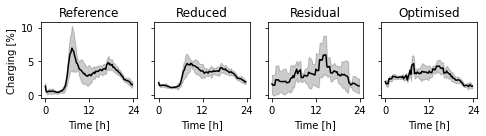

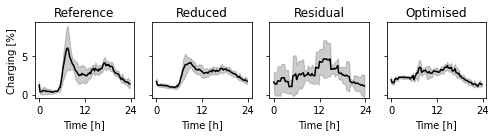

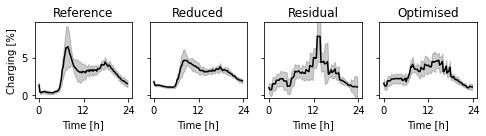

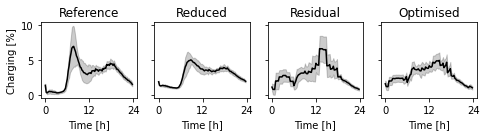

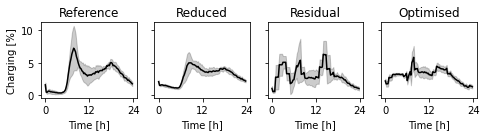

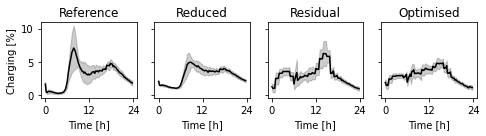

In [15]:
for grid_id in grid_ids:
    tmp = charging[grid_id]
    fig, axs = plt.subplots(1,4, figsize=(7,2.0))
    sns.lineplot(data=tmp['dumb'], x='time', y='Charging [%]', ci='sd', ax=axs[0], color='k')
    sns.lineplot(data=tmp['reduced'], x='time', y='Charging [%]', ci='sd', ax=axs[1], color='k')
    sns.lineplot(data=tmp['residual'], x='time', y='Charging [%]', ci='sd', ax=axs[2], color='k')
    sns.lineplot(data=tmp['optimised'], x='time', y='Charging [%]', ci='sd', ax=axs[3], color='k')
    axs[0].set_title('Reference')
    axs[0].set_ylabel('Charging [%]')
    axs[0].set_xlabel('Time [h]')

    axs[1].set_title('Reduced')
    axs[1].set_ylabel('')
    axs[1].set_xlabel('Time [h]')
    axs[1].set_yticklabels([])
    axs[2].set_title('Residual')
    axs[2].set_ylabel('')
    axs[2].set_xlabel('Time [h]')
    axs[2].set_yticklabels([])
    
    axs[3].set_title('Optimised')
    axs[3].set_ylabel('')
    axs[3].set_xlabel('Time [h]')
    axs[3].set_yticklabels([])
    ylim = axs[0].get_ylim()
    for ax in axs:
        #ax.hlines(0, 0, 24, colors='k', linestyles = 'dotted')
        ax.set_xticks([0,12,24])
        ax.set_ylim(ylim)
        #plt.hlines(0, 0, 24, colors='k', linestyles = 'dashed')
    #diff_grid_wise['load']
    plt.tight_layout()
    plt.savefig('results/plots/charging_patterns_{}.png'.format(grid_id), dpi=300)

## Curtailment
This section compares the curtailment temporally and cumulated.

### Temporal assessment

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np

In [88]:
# 2D heatmap with monthly-hourly resolution
def plot_hm_quarterly_curt_blue(df_power, df_energy, v_max=None, v_min=0, filename=None, title=None, figsize=(6, 2.25), 
                         left_title='Shiftable Power [MW]', right_title='Shiftable Energy [MWh]', diff=False):

    index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    fig, ax =  plt.subplots(1, 2, figsize=figsize)
    plt.subplots_adjust(bottom=0.3)

    df = pd.DataFrame(df_power)
    if diff:
        max_dev = df.abs().max()
        v_min = -max_dev
        v_max = max_dev

    df['quarter_of_day'] = df.index.hour * 4 + np.floor(df.index.minute/15)
    grouped = df.groupby([df.index.day%7, 'quarter_of_day']).sum().unstack()
    grouped.columns = ["{}:{}".format(int(d/4), (d%4)*15) for d in grouped.columns.get_level_values(1)]
    grouped.index = [calendar.day_name[m-1][0:3] for m in grouped.index]
    grouped_sorted=grouped.loc[index]

    g = sns.heatmap(grouped_sorted, cmap='Blues', xticklabels=False, vmin=v_min, vmax=v_max, ax=ax[0],
                    cbar=True, linewidths=0)  
    g.set_xticks(np.arange(0, 97, 48))
    g.set_xticklabels(['00:00', '12:00', '00:00'])

    ax[0].title.set_text(left_title)

    df = pd.DataFrame(df_energy)
    
    if diff:
        max_dev = df.abs().max()
        v_min = -max_dev
        v_max = max_dev

    df['quarter_of_day'] = df.index.hour * 4 + np.floor(df.index.minute/15)
    grouped = df.groupby([df.index.day%7, 'quarter_of_day']).sum().unstack()
    grouped.columns = ["{}:{}".format(int(d/4), (d%4)*15) for d in grouped.columns.get_level_values(1)]
    grouped.index = [calendar.day_name[m-1][0:3] for m in grouped.index]
    grouped_sorted=grouped.loc[index]

    g = sns.heatmap(grouped_sorted, cmap='Blues', xticklabels=False, vmin=v_min, vmax=v_max, ax=ax[1],
                    cbar=True, linewidths=0)  
    g.set_xticks(np.arange(0, 97, 48))
    g.set_xticklabels(['00:00', '12:00', '00:00'])
    g.set_yticks([])

    ax[1].title.set_text(right_title)
    if title:
        fig.suptitle(title)
        
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

In [89]:
root_dir = r'U:\Software'

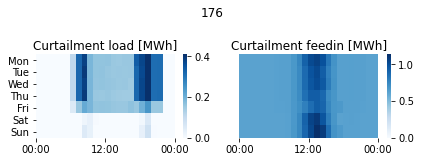

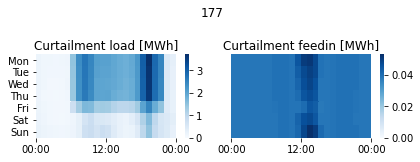

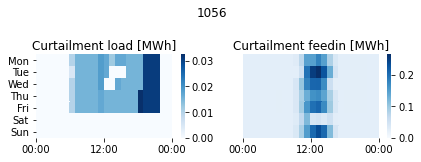

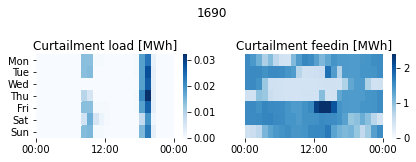

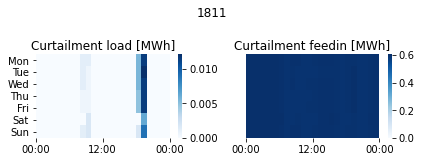

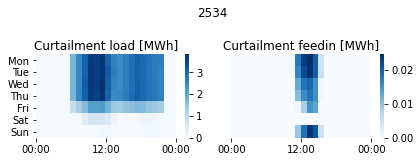

In [90]:
strategy='no_ev'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
    timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
    curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    plot_hm_quarterly_curt_blue(curt_load, curt_feedin, left_title='Curtailment load [MWh]', right_title='Curtailment feedin [MWh]', title=grid_id,
                               filename='results/plots/curtailment_temporal_{}.png'.format(grid_id))

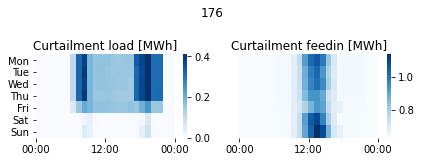

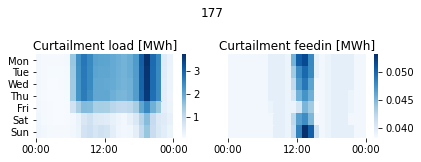

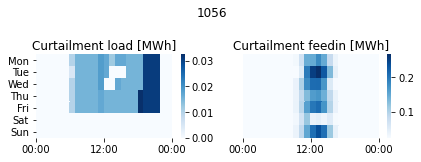

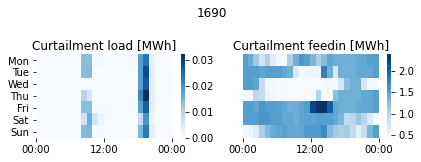

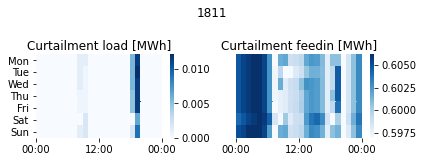

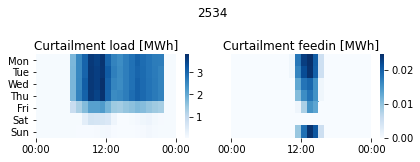

In [14]:
strategy='no_ev'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
    timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
    curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    plot_hm_quarterly_curt_blue(curt_load, curt_feedin, v_min=None, left_title='Curtailment load [MWh]', right_title='Curtailment feedin [MWh]', title=grid_id)

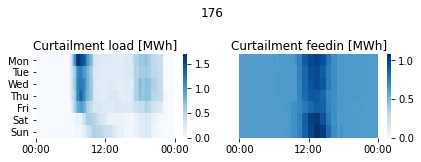

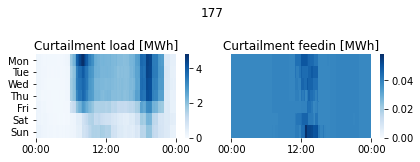

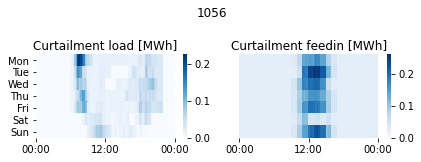

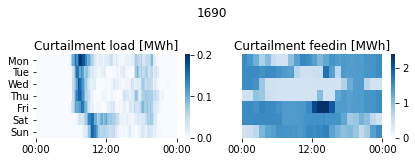

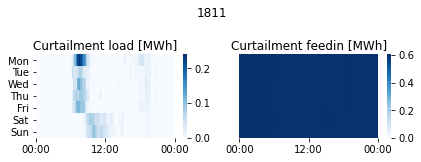

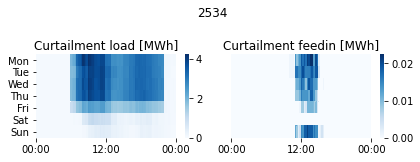

In [15]:
strategy='dumb'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
    timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
    curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    plot_hm_quarterly_curt_blue(curt_load, curt_feedin, left_title='Curtailment load [MWh]', right_title='Curtailment feedin [MWh]', title=grid_id)

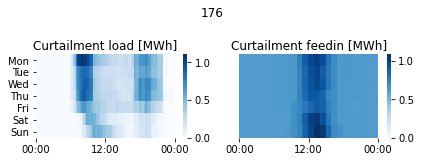

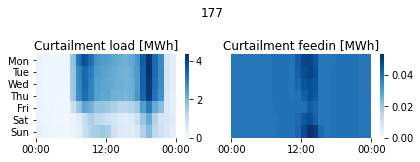

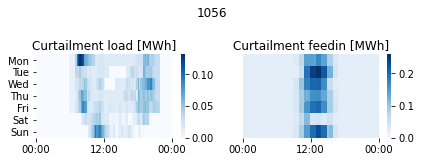

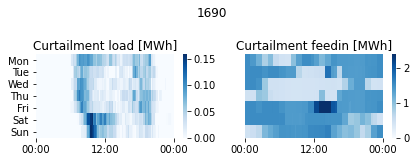

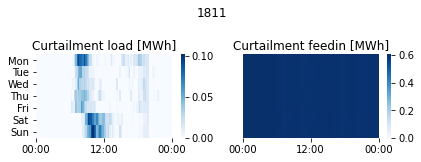

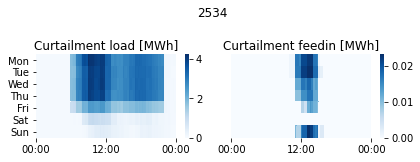

In [16]:
strategy='reduced'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
    timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
    curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    plot_hm_quarterly_curt_blue(curt_load, curt_feedin, left_title='Curtailment load [MWh]', right_title='Curtailment feedin [MWh]', title=grid_id)

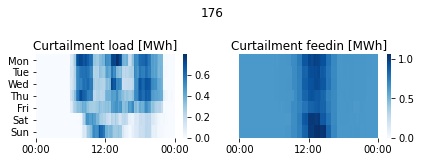

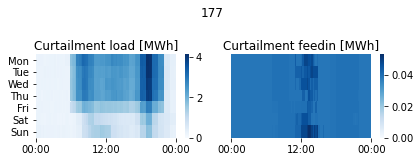

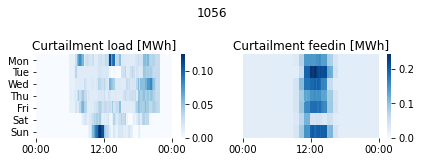

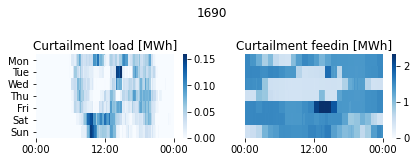

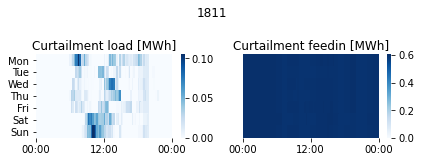

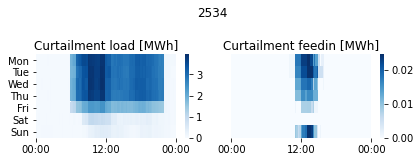

In [17]:
strategy='residual'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
    timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
    curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    plot_hm_quarterly_curt_blue(curt_load, curt_feedin, left_title='Curtailment load [MWh]', right_title='Curtailment feedin [MWh]', title=grid_id)

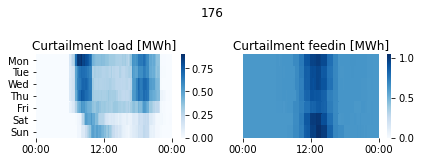

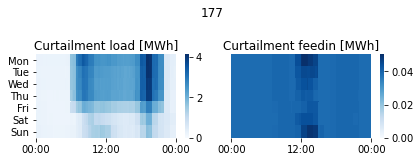

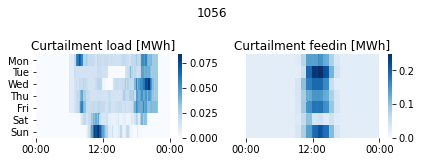

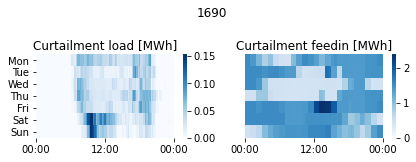

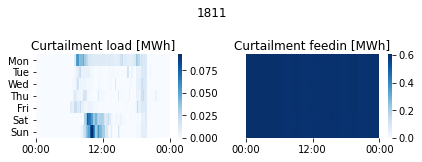

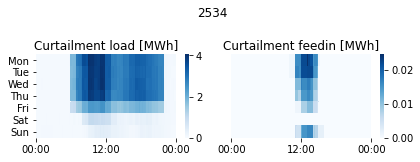

In [18]:
strategy='optimised'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
    timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
    curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)/4
    plot_hm_quarterly_curt_blue(curt_load, curt_feedin, left_title='Curtailment load [MWh]', right_title='Curtailment feedin [MWh]', title=grid_id)

In [19]:
# 2D heatmap with monthly-hourly resolution
def plot_hm_quarterly_curt(df_power, df_energy, v_max=None, v_min=0, filename=None, title=None, figsize=(6, 2.25), 
                         left_title='Shiftable Power [MW]', right_title='Shiftable Energy [MWh]', diff=False):

    index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    fig, ax =  plt.subplots(1, 2, figsize=figsize)
    plt.subplots_adjust(bottom=0.3)

    df = pd.DataFrame(df_power)
    if diff:
        max_dev = df.abs().max()
        v_min = -max_dev
        v_max = max_dev

    df['quarter_of_day'] = df.index.hour * 4 + np.floor(df.index.minute/15)
    grouped = df.groupby([df.index.day%7, 'quarter_of_day']).sum().unstack()
    grouped.columns = ["{}:{}".format(int(d/4), (d%4)*15) for d in grouped.columns.get_level_values(1)]
    grouped.index = [calendar.day_name[m-1][0:3] for m in grouped.index]
    grouped_sorted=grouped.loc[index]

    g = sns.heatmap(grouped_sorted, cmap='RdYlGn_r', xticklabels=False, vmin=v_min, vmax=v_max, ax=ax[0],
                    cbar=True, linewidths=0)  
    g.set_xticks(np.arange(0, 97, 48))
    g.set_xticklabels(['00:00', '12:00', '00:00'])

    ax[0].title.set_text(left_title)

    df = pd.DataFrame(df_energy)
    
    if diff:
        max_dev = df.abs().max()
        v_min = -max_dev
        v_max = max_dev

    df['quarter_of_day'] = df.index.hour * 4 + np.floor(df.index.minute/15)
    grouped = df.groupby([df.index.day%7, 'quarter_of_day']).sum().unstack()
    grouped.columns = ["{}:{}".format(int(d/4), (d%4)*15) for d in grouped.columns.get_level_values(1)]
    grouped.index = [calendar.day_name[m-1][0:3] for m in grouped.index]
    grouped_sorted=grouped.loc[index]

    g = sns.heatmap(grouped_sorted, cmap='RdYlGn_r', xticklabels=False, vmin=v_min, vmax=v_max, ax=ax[1],
                    cbar=True, linewidths=0)  
    g.set_xticks(np.arange(0, 97, 48))
    g.set_xticklabels(['00:00', '12:00', '00:00'])
    g.set_yticks([])

    ax[1].title.set_text(right_title)
    if title:
        fig.suptitle(title)
        
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

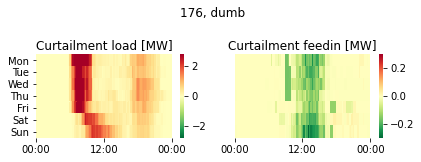

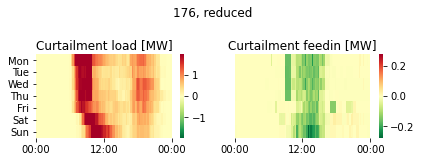

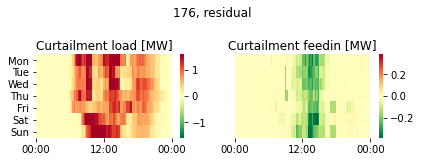

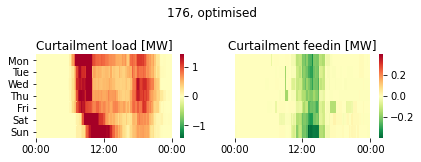

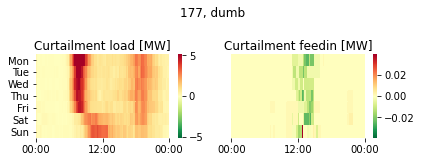

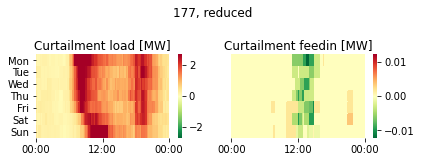

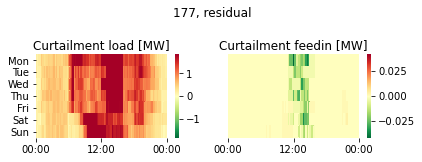

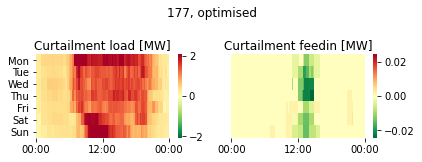

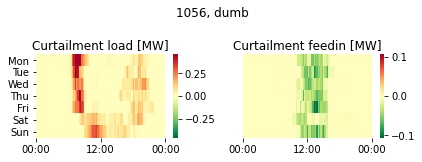

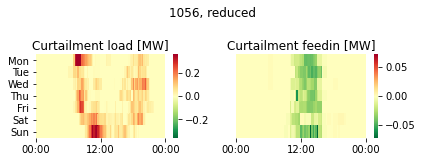

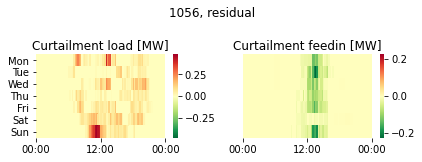

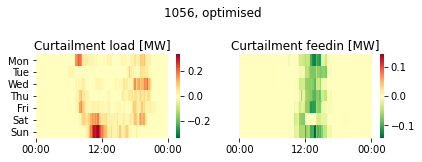

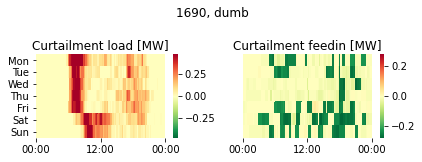

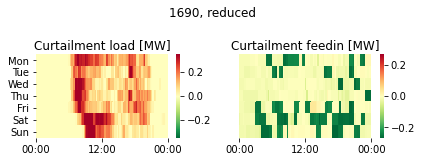

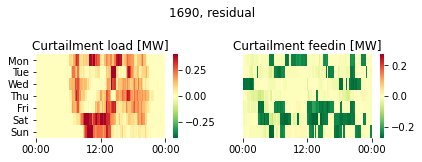

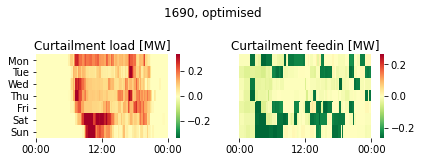

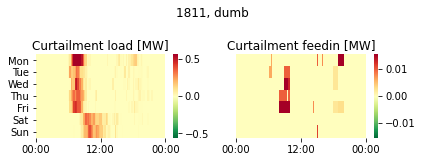

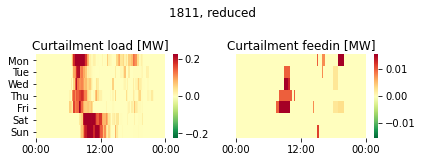

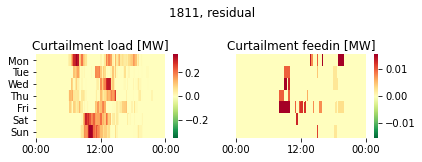

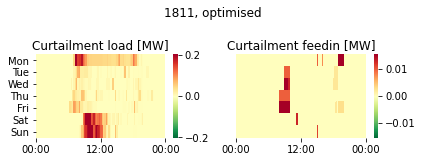

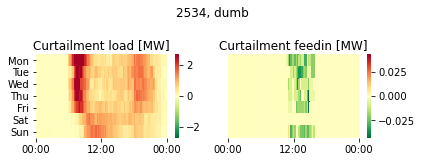

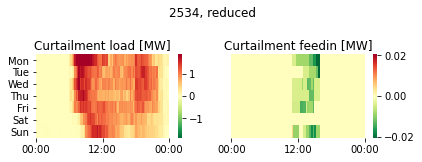

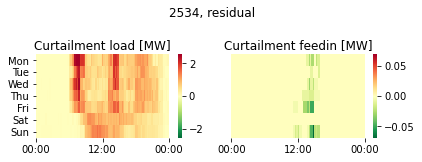

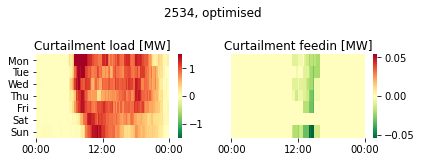

In [23]:
strategy_ref='no_ev'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
        curt_dir_no_ev = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id,strategy_ref)
        timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
        curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_load_no_ev = pd.read_csv(curt_dir_no_ev + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_feedin_no_ev = pd.read_csv(curt_dir_no_ev + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        plot_hm_quarterly_curt(curt_load-curt_load_no_ev, curt_feedin-curt_feedin_no_ev, left_title='Curtailment load [MW]', 
                               right_title='Curtailment feedin [MW]', title='{}, {}'.format(grid_id, strategy), diff=True)

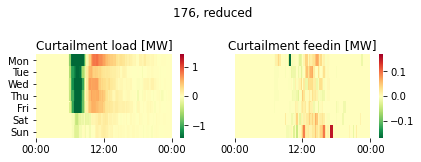

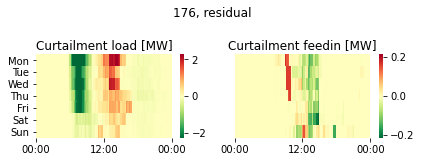

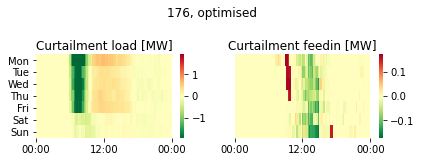

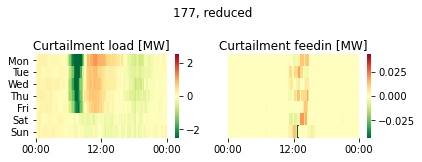

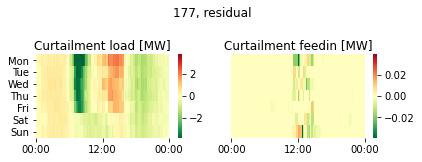

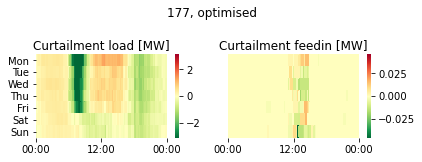

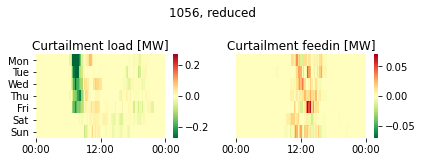

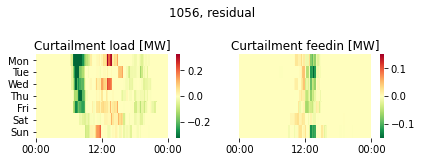

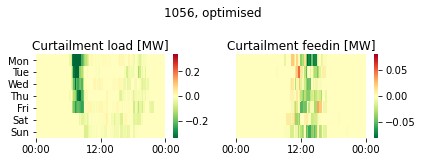

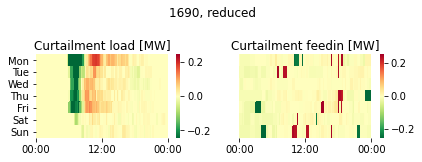

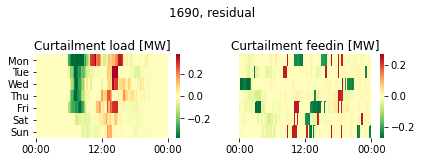

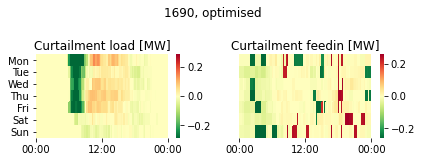

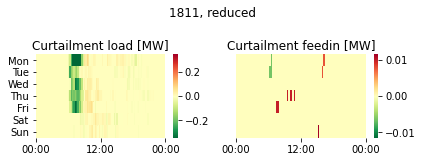

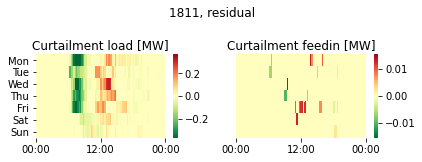

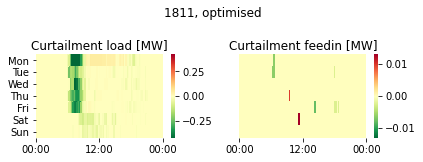

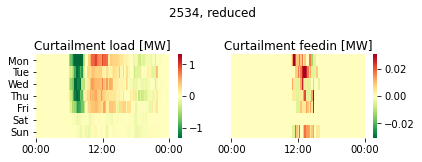

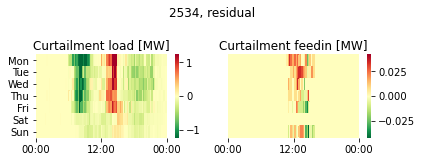

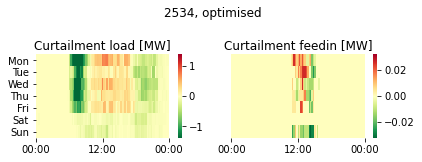

In [24]:
strategy_ref='dumb'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    for strategy in ['reduced', 'residual', 'optimised']:
        curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
        curt_dir_no_ev = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id,strategy_ref)
        timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
        curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_load_no_ev = pd.read_csv(curt_dir_no_ev + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_feedin_no_ev = pd.read_csv(curt_dir_no_ev + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        plot_hm_quarterly_curt(curt_load-curt_load_no_ev, curt_feedin-curt_feedin_no_ev, left_title='Curtailment load [MW]', 
                               right_title='Curtailment feedin [MW]', title='{}, {}'.format(grid_id, strategy), diff=True)

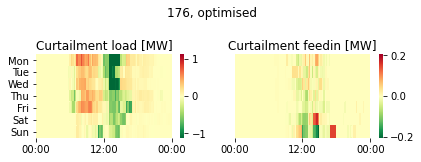

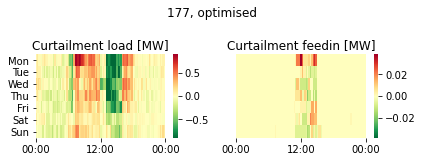

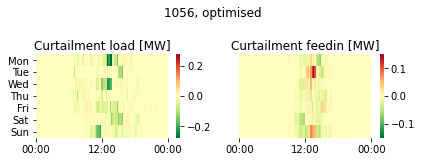

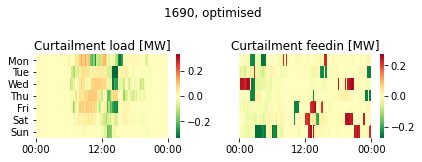

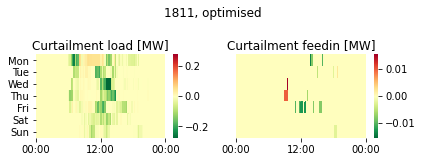

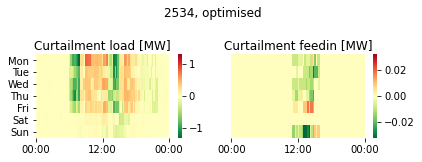

In [25]:
strategy_ref='residual'
for grid_id in [176, 177, 1056, 1690, 1811, 2534]:
    for strategy in ['optimised']:
        curt_dir = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id, strategy)
        curt_dir_no_ev = root_dir + r'\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(grid_id,strategy_ref)
        timeindex = pd.date_range('2029-01-01 7:00', '2029-01-15 6:45', freq='15min')
        curt_load = pd.read_csv(curt_dir + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_load_no_ev = pd.read_csv(curt_dir_no_ev + '/curtailment_ts_demand_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_feedin = pd.read_csv(curt_dir + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        curt_feedin_no_ev = pd.read_csv(curt_dir_no_ev + '/curtailment_ts_feedin_01percent.csv', index_col=0, parse_dates=True).set_index(timeindex)
        plot_hm_quarterly_curt(curt_load-curt_load_no_ev, curt_feedin-curt_feedin_no_ev, left_title='Curtailment load [MW]', 
                               right_title='Curtailment feedin [MW]', title='{}, {}'.format(grid_id, strategy), diff=True)

### Cumulated assessment

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from itertools import product

In [36]:
def plot_absolute_curtailment(df_plot_birgit, grid_ids_order, strategies_orig):
    curtailment_feedin=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='feed-in')]
    curtailment_feedin_mv=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='feed-in')]
    curtailment_load=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='load')]
    curtailment_load_mv=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='load')]

    for grid_id in grid_ids_order:
        for strategy in strategies_orig:
            curtailment_feedin.loc[(curtailment_feedin.grid_id==grid_id)&(curtailment_feedin.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='feed-in')].curtailment.sum()
            curtailment_feedin_mv.loc[(curtailment_feedin_mv.grid_id==grid_id)&(curtailment_feedin_mv.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='feed-in')].curtailment.sum()
            curtailment_load.loc[(curtailment_load.grid_id==grid_id)&(curtailment_load.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='load')].curtailment.sum()
            curtailment_load_mv.loc[(curtailment_load_mv.grid_id==grid_id)&(curtailment_load_mv.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='load')].curtailment.sum()
            colors=sns.color_palette('Greys')[0:5]
    #sns.set_context(rc = {'patch.linewidth': 1})
    ax=sns.barplot(data=curtailment_load, x='grid_id', y='curtailment', hue='strategy', palette=colors, order=grid_ids_order, edgecolor=".2", linewidth=1)
    sns.barplot(data=curtailment_load_mv, x='grid_id', y='curtailment', hue='strategy', palette=colors, ax=ax, hatch='///', order=grid_ids_order, edgecolor=".2", linewidth=1)
    sns.barplot(data=curtailment_feedin, x='grid_id', y='curtailment', hue='strategy', palette=colors, ax=ax, order=grid_ids_order, edgecolor=".2", linewidth=1)
    sns.barplot(data=curtailment_feedin_mv, x='grid_id', y='curtailment', hue='strategy', palette=colors, ax=ax, hatch='///', order=grid_ids_order, edgecolor=".2", linewidth=1)
    # handle legend
    ax.legend_.remove()
    circ1 = mpatches.Patch( facecolor='grey', alpha=0.0, label=' ')
    circ2= mpatches.Patch( facecolor='grey',hatch='///',label='MV', edgecolor=".2", linewidth=1)
    circ3 = mpatches.Patch(facecolor='grey', label='LV', edgecolor=".2", linewidth=1)
    circ4 = mpatches.Patch( facecolor=colors[0], label='No EV', edgecolor=".2", linewidth=1)
    circ5= mpatches.Patch( facecolor=colors[1], label='Reference', edgecolor=".2", linewidth=1)
    circ6 = mpatches.Patch(facecolor=colors[2], label='Reduced', edgecolor=".2", linewidth=1)
    circ7 = mpatches.Patch(facecolor=colors[3], label='Residual', edgecolor=".2", linewidth=1)
    circ8 = mpatches.Patch(facecolor=colors[4], label='Optimised', edgecolor=".2", linewidth=1)
    ax.legend(handles = [circ1, circ2, circ3, circ1, circ1,circ4,circ5, circ6, circ7, circ8, ], 
              loc='best', ncol=2)#loc='upper center', bbox_to_anchor=(0.44, 1.23), 
    #ax.set_xticklabels(['$177_L$', '$2534_L$', '$176_{PV}$', '$1056_{PV}$', '$1811_W$', '$1690_W$'])
    ax.set_xlabel('Grid ID')
    ax.set_ylabel('Curtailment [MWh]')
    #plt.setp(ax.patches, linewidth=1)
    #ax.set_ylim([-50,4200])
    plt.title('Total curtailment in grids')

In [151]:
def plot_relative_curtailment(df_plot_birgit, grid_ids_order, strategies_orig):
    curtailment_feedin=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='feed-in')]
    curtailment_feedin_mv=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='feed-in')]
    curtailment_load=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='load')]
    curtailment_load_mv=df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.kind=='load')]

    for grid_id in grid_ids_order:
        for strategy in strategies_orig:
            curtailment_feedin.loc[(curtailment_feedin.grid_id==grid_id)&(curtailment_feedin.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='feed-in')].curtailment.sum()
            curtailment_feedin_mv.loc[(curtailment_feedin_mv.grid_id==grid_id)&(curtailment_feedin_mv.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='feed-in')].curtailment.sum()
            curtailment_load.loc[(curtailment_load.grid_id==grid_id)&(curtailment_load.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='load')].curtailment.sum()
            curtailment_load_mv.loc[(curtailment_load_mv.grid_id==grid_id)&(curtailment_load_mv.strategy==strategy), 'curtailment']=\
                df_plot_birgit.loc[(df_plot_birgit.problem=='curtailment MV')&(df_plot_birgit.grid_id==grid_id)&(df_plot_birgit.strategy==strategy)&(df_plot_birgit.kind=='load')].curtailment.sum()
            colors=sns.color_palette('Greys')[0:5]
    #sns.set_context(rc = {'patch.linewidth': 1})
    ax=sns.barplot(data=curtailment_load, x='grid_id', y='curtailment', hue='strategy', palette=colors[1:], order=grid_ids_order, edgecolor=".2", linewidth=1)
    sns.barplot(data=curtailment_load_mv, x='grid_id', y='curtailment', hue='strategy', palette=colors[1:], ax=ax, hatch='///', order=grid_ids_order, edgecolor=".2", linewidth=1)
    sns.barplot(data=curtailment_feedin, x='grid_id', y='curtailment', hue='strategy', palette=colors[1:], ax=ax, order=grid_ids_order, edgecolor=".2", linewidth=1)
    sns.barplot(data=curtailment_feedin_mv, x='grid_id', y='curtailment', hue='strategy', palette=colors[1:], ax=ax, hatch='///', order=grid_ids_order, edgecolor=".2", linewidth=1)
    # handle legend
    ax.legend_.remove()
    circ1 = mpatches.Patch( facecolor='grey', alpha=0.0, label=' ')
    circ2= mpatches.Patch( facecolor='grey',hatch='///',label='MV', edgecolor=".2", linewidth=1)
    circ3 = mpatches.Patch(facecolor='grey', label='LV', edgecolor=".2", linewidth=1)
    circ4 = mpatches.Patch( facecolor=colors[0], label='No EV', edgecolor=".2", linewidth=1)
    circ5= mpatches.Patch( facecolor=colors[1], label='Reference', edgecolor=".2", linewidth=1)
    circ6 = mpatches.Patch(facecolor=colors[2], label='Reduced', edgecolor=".2", linewidth=1)
    circ7 = mpatches.Patch(facecolor=colors[3], label='Residual', edgecolor=".2", linewidth=1)
    circ8 = mpatches.Patch(facecolor=colors[4], label='Optimised', edgecolor=".2", linewidth=1)
    ax.legend(handles = [circ1, circ2, circ3, circ1, circ5, circ6, circ7, circ8, ], 
              loc='best', ncol=2)#loc='upper center', bbox_to_anchor=(0.44, 1.23), 
    #ax.set_xticklabels(['$177_L$', '$2534_L$', '$176_{PV}$', '$1056_{PV}$', '$1811_W$', '$1690_W$'])
    ax.set_xlabel('Grid ID')
    ax.set_ylabel('Curtailment [MWh]')
    #plt.setp(ax.patches, linewidth=1)
    #ax.set_ylim([-50,4200])
    plt.title('Additional curtailment by EV integration')

In [3]:
strategies = ['no_ev', 'dumb', 'reduced', 'residual', 'optimised']
grid_ids = [177, 2534, 176, 1056, 1811, 1690]
data_dir = r'U:\Software\eDisGo_object_files\simbev_nep_2035_results'
curtailment_01percent = pd.DataFrame(columns=['grid_id', 'strategy', 'problem', 'kind', 'curtailment'])
for grid_id in grid_ids:
    for strategy in strategies:
        curtailment_tmp = pd.read_csv(data_dir+'/{}/{}/curtailment_01percent.csv'.format(grid_id, strategy),
                                      index_col=0)
        for problem in ['mv', 'lv']:
            for kind in ['feed-in', 'load']:
                curtailment_01percent=curtailment_01percent.append(
                    pd.Series({'grid_id': grid_id, 'strategy': strategy, 
                               'problem': 'curtailment {}'.format(problem.upper()),
                               'kind': kind, 'curtailment': curtailment_tmp.loc['{}_problems'.format(problem), kind]+
                              curtailment_tmp.loc['convergence_issues_{}'.format(problem), kind]}), ignore_index=True)

In [8]:
plt_curtailment_01percent = curtailment_01percent.copy()

In [14]:
plt_curtailment_01percent.loc[plt_curtailment_01percent.kind=='feed-in','curtailment']=-plt_curtailment_01percent.loc[plt_curtailment_01percent.kind=='feed-in','curtailment']

In [40]:
curtailment_01percent[['strategy', 'grid_id','curtailment']].groupby(['grid_id', 'strategy']).sum()

curtailment
grid_id strategy              
176     dumb       2569.453430
        no_ev      2187.435598
        optimised  2498.495018
        reduced    2549.560141
        residual   2523.539347
177     dumb       4205.716401
        no_ev      3353.431960
        optimised  4046.038013
        reduced    4142.457033
        residual   4052.626604
1056    dumb        200.268838
        no_ev       174.397999
        optimised   182.376629
        reduced     194.285936
        residual    189.388533
1690    dumb       3204.832395
        no_ev      3185.174278
        optimised  3187.845020
        reduced    3201.670038
        residual   3195.452365
1811    dumb       1648.411338
        no_ev      1618.933716
        optimised  1631.502724
        reduced    1639.762082
        residual   1642.176834
2534    dumb       4018.380253
        no_ev      3564.325225
        optimised  3953.106704
        reduced    4007.520282
        residual   3956.840349

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


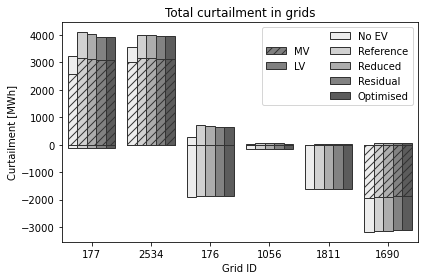

In [42]:
plot_absolute_curtailment(plt_curtailment_01percent, grid_ids, strategies)
plt.tight_layout()
plt.savefig('results/plots/curtailment_absolute.png', dpi=300)

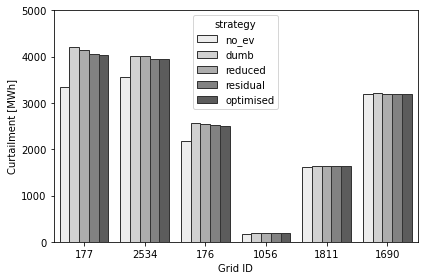

In [157]:
absolute_curtailment = curtailment_01percent[['strategy', 'grid_id','curtailment']].groupby(['grid_id', 'strategy']).sum()
ax=sns.barplot(data=absolute_curtailment.reset_index(), x='grid_id', y='curtailment', hue='strategy', palette=colors, 
            order=grid_ids, hue_order=strategies, edgecolor=".2", linewidth=1)
plt.ylim([0,5000])
ax.set_xlabel('Grid ID')
ax.set_ylabel('Curtailment [MWh]')
plt.tight_layout()
plt.savefig('results/plots/curtailment_cumulated.png', dpi=300)

In [142]:
total_curtailment_diff_plt = curtailment_01percent.loc[curtailment_01percent['strategy']!='no_ev']
mvlv_curtailment_diff_plt = curtailment_01percent.loc[(curtailment_01percent['strategy']!='no_ev')&(curtailment_01percent['problem']=='curtailment MV')]
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        
        total_curtailment_diff_plt.loc[(total_curtailment_diff_plt['grid_id']==grid_id)&(total_curtailment_diff_plt['strategy']==strategy), 
                                       'curtailment'] = total_curtailment_diff_plt.loc[(total_curtailment_diff_plt['grid_id']==grid_id)&(total_curtailment_diff_plt['strategy']==strategy), 
                                                                                       'curtailment'].values-\
            curtailment_01percent.loc[(curtailment_01percent['grid_id']==grid_id)&(curtailment_01percent['strategy']=='no_ev'), 
                                                                                       'curtailment'].values
    #mvlv_curtailment_diff_plt.loc[mvlv_curtailment_diff_plt['grid_id']==grid_id, y_name] = mvlv_curtailment_diff_plt.loc[mvlv_curtailment_diff_plt['grid_id']==grid_id, 'curtailment'].values-mvlv_curtailment_plt.loc[(mvlv_curtailment_plt['grid_id']==grid_id)&(mvlv_curtailment_plt['strategy']=='no_ev'), 'curtailment'].values[0]

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


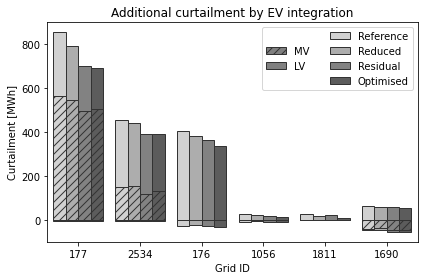

In [152]:
plot_relative_curtailment(total_curtailment_diff_plt, grid_ids, ['dumb', 'reduced', 'residual', 'optimised'])
plt.tight_layout()
plt.savefig('results/plots/curtailment_additional.png', dpi=300)

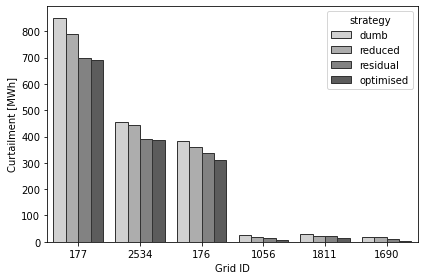

In [174]:
additional_curtailment = total_curtailment_diff_plt[['strategy', 'grid_id','curtailment']].groupby(['grid_id', 'strategy']).sum()
ax=sns.barplot(data=additional_curtailment.reset_index(), x='grid_id', y='curtailment', hue='strategy', palette=colors[1:], 
            order=grid_ids, hue_order=['dumb', 'reduced', 'residual', 'optimised'], edgecolor=".2", linewidth=1)
ax.set_xlabel('Grid ID')
ax.set_ylabel('Curtailment [MWh]')
plt.tight_layout()
plt.savefig('results/plots/curtailment_additional_cumulated.png', dpi=300)

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


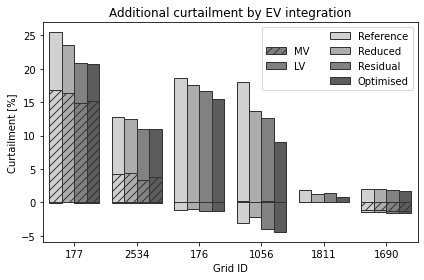

In [161]:
# additional curtailment relative to original curtailment
rel_curtailment_diff_plt = total_curtailment_diff_plt.copy()
for grid_id in grid_ids:
    rel_curtailment_diff_plt.loc[rel_curtailment_diff_plt.grid_id == grid_id, 'curtailment'] = \
        rel_curtailment_diff_plt.loc[rel_curtailment_diff_plt.grid_id == grid_id, 'curtailment']/absolute_curtailment.loc[grid_id, 'no_ev'].values[0]*100
plot_relative_curtailment(rel_curtailment_diff_plt, grid_ids, ['dumb', 'reduced', 'residual', 'optimised'])
plt.tight_layout()
plt.ylabel('Curtailment [%]')
plt.savefig('results/plots/curtailment_additional_relative.png', dpi=300)

In [166]:
rel_additional_curtailment = rel_curtailment_diff_plt.groupby(['grid_id', 'strategy']).sum()
relative_additional_curtailent = pd.DataFrame(index=grid_ids, columns=['dumb', 'reduced', 'residual', 'optimised'])
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        relative_additional_curtailent.loc[grid_id, strategy] = rel_additional_curtailment.loc[grid_id,strategy].values[0]
relative_additional_curtailent

,dumb,reduced,residual,optimised
177,25.4153,23.5289,20.8501,20.6536
2534,12.7389,12.4342,11.0123,10.9076
176,17.4642,16.5548,15.3652,14.2203
1056,14.8344,11.4038,8.59559,4.57495
1811,1.8208,1.28655,1.43571,0.776376
1690,0.617176,0.517892,0.322685,0.0838491


In [168]:
relative_additional_curtailent_diff = pd.DataFrame()
for strategy in ['reduced', 'residual', 'optimised']:
    relative_additional_curtailent_diff[strategy] = relative_additional_curtailent[strategy]/relative_additional_curtailent['dumb']*100
relative_additional_curtailent_diff

,reduced,residual,optimised
177,92.5777,82.0377,81.2647
2534,97.6082,86.4466,85.6243
176,94.7926,87.9812,81.4254
1056,76.874,57.9437,30.8402
1811,70.6582,78.85,42.6392
1690,83.9132,52.2842,13.5859


In [173]:
# additional curtailment relative to consumed energy
total_charging_demand = pd.DataFrame(index=grid_ids, columns=strategies)
for var in set(product(grid_ids, strategies)):
    if var[1] == 'no_ev':
        continue
    edisgo_dir = r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\{}'.format(var[0], var[1])
    charging_demand = charging_ts = pd.read_csv(edisgo_dir+r'\timeseries\charging_points_active_power.csv', index_col=0,
                                          parse_dates=True)
    total_charging_demand.loc[var[0], var[1]] = charging_demand.sum().sum()
total_charging_demand.fillna(0)

,no_ev,dumb,reduced,residual,optimised
177,0,2781.811667,2781.559584,2780.659333,2764.613372
2534,0,1567.602333,1568.996962,1560.495000,1565.508920
176,0,2908.549000,2908.448124,2898.724333,2879.972176
1056,0,1069.937667,1069.283503,1068.635000,1060.899682
1811,0,1352.289000,1352.467019,1353.572333,1327.562426
1690,0,1099.807667,1097.816844,1094.928667,1069.307628


c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


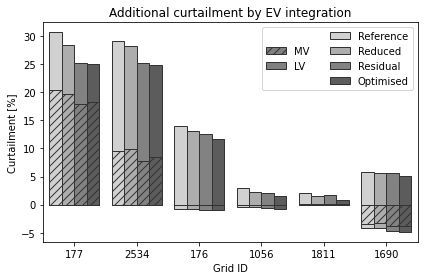

In [178]:
curtailment_relative_to_load = total_curtailment_diff_plt.copy()
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        curtailment_relative_to_load.loc[(curtailment_relative_to_load.grid_id==grid_id)&
                                        (curtailment_relative_to_load.strategy==strategy), 'curtailment'] = \
            curtailment_relative_to_load.loc[(curtailment_relative_to_load.grid_id==grid_id)&
                                        (curtailment_relative_to_load.strategy==strategy), 'curtailment']/total_charging_demand.loc[grid_id,strategy]*100
plot_relative_curtailment(curtailment_relative_to_load, grid_ids, ['dumb', 'reduced', 'residual', 'optimised'])
plt.tight_layout()
plt.ylabel('Curtailment [%]')
plt.savefig('results/plots/curtailment_additional_relative_to_load.png', dpi=300)

In [179]:
tmp = curtailment_relative_to_load.copy()
tmp = tmp.groupby(['grid_id', 'strategy']).sum()
new_df = pd.DataFrame(index=grid_ids, columns=['dumb', 'reduced', 'residual', 'optimised'])
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        new_df.loc[grid_id, strategy] = tmp.loc[grid_id,strategy].values[0]
curtailment_relative_to_load_df = new_df
curtailment_relative_to_load_df

,dumb,reduced,residual,optimised
177,30.6377,28.3663,25.1449,25.0525
2534,28.9649,28.247,25.1532,24.8342
176,13.1343,12.4508,11.5949,10.8008
1056,2.41798,1.85993,1.40277,0.752063
1811,2.17983,1.54003,1.71717,0.946773
1690,1.78741,1.5026,0.938699,0.249764


In [180]:
new_rel_df = pd.DataFrame()
for strategy in ['reduced', 'residual', 'optimised']:
    new_rel_df[strategy] = new_df[strategy]/new_df['dumb']*100
curtailment_relative_to_load_df_diff = new_rel_df
curtailment_relative_to_load_df_diff

,reduced,residual,optimised
177,92.5861,82.0717,81.7702
2534,97.5215,86.8403,85.7388
176,94.7959,88.2794,82.2333
1056,76.921,58.0144,31.103
1811,70.6489,78.7753,43.4333
1690,84.0654,52.5172,13.9735


In [182]:
# additional curtailment relative to installed capacity
installed_capacities = {}
for grid_id in grid_ids:
    cps = pd.read_csv(r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\dumb\topology\charging_points.csv'.format(grid_id))
    installed_capacities[grid_id] = cps.p_nom.sum()
installed_capacities

{177: 68.1038,
 2534: 37.709,
 176: 72.47370000000001,
 1056: 28.8881,
 1811: 39.6904,
 1690: 28.189500000000002}

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


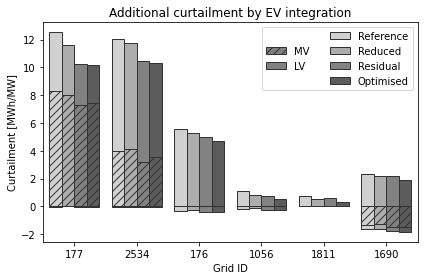

In [183]:
curtailment_relative_to_cap = total_curtailment_diff_plt.copy()
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        curtailment_relative_to_cap.loc[(curtailment_relative_to_cap.grid_id==grid_id)&
                                        (curtailment_relative_to_cap.strategy==strategy), 'curtailment'] = \
            curtailment_relative_to_cap.loc[(curtailment_relative_to_cap.grid_id==grid_id)&
                                        (curtailment_relative_to_cap.strategy==strategy), 'curtailment']/installed_capacities[grid_id]
plot_relative_curtailment(curtailment_relative_to_cap, grid_ids, ['dumb', 'reduced', 'residual', 'optimised'])
plt.tight_layout()
plt.ylabel('Curtailment [MWh/MW]')
plt.savefig('results/plots/curtailment_additional_relative_to_cap.png', dpi=300)

In [184]:
tmp = curtailment_relative_to_cap.copy()
tmp = tmp.groupby(['grid_id', 'strategy']).sum()
new_df = pd.DataFrame(index=grid_ids, columns=['dumb', 'reduced', 'residual', 'optimised'])
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        new_df.loc[grid_id, strategy] = tmp.loc[grid_id,strategy].values[0]
curtailment_relative_to_cap_df = new_df
curtailment_relative_to_cap_df

,dumb,reduced,residual,optimised
177,12.5145,11.5856,10.2666,10.1699
2534,12.041,11.753,10.4091,10.31
176,5.27112,4.99663,4.6376,4.29203
1056,0.895553,0.688447,0.518917,0.276191
1811,0.742689,0.524771,0.585611,0.316676
1690,0.697356,0.585174,0.364607,0.0947424


In [185]:
new_rel_df = pd.DataFrame()
for strategy in ['reduced', 'residual', 'optimised']:
    new_rel_df[strategy] = new_df[strategy]/new_df['dumb']*100
curtailment_relative_to_cap_df_diff = new_rel_df
curtailment_relative_to_cap_df_diff

,reduced,residual,optimised
177,92.5777,82.0377,81.2647
2534,97.6082,86.4466,85.6243
176,94.7926,87.9812,81.4254
1056,76.874,57.9437,30.8402
1811,70.6582,78.85,42.6392
1690,83.9132,52.2842,13.5859


## Geographical evaluation
Evaluation where charging, curtailment and grid expansion take place

In [1]:
import pandas as pd
import os
from edisgo.edisgo import import_edisgo_from_files

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\sqlalchemy\ext\declarative\base.py:436: SAWarning:

Ignoring declarative-like tuple value of attribute 'segment': possibly a copy-and-paste error with a comma accidentally placed at the end of the line?

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\sqlalchemy\ext\declarative\base.py:436: SAWarning:

Ignoring declarative-like tuple value of attribute 'cable': possibly a copy-and-paste error with a comma accidentally placed at the end of the line?



In [5]:
# Check voltage levels of different types of charging
root_dir = r'U:\Software\eDisGo_object_files\simbev_nep_2035_results'
grid_ids = [177, 2534, 176, 1056, 1811, 1690]
use_cases = ['fast', 'public', 'home', 'work']
cps = {}
charging = {}
charging_demand_df = pd.DataFrame(index=grid_ids, columns=use_cases)
installed_capacities_df = pd.DataFrame(index=grid_ids, columns=use_cases)
for grid_id in grid_ids: 
    cps[grid_id] = pd.read_csv(os.path.join(root_dir, str(grid_id), 'dumb' ,'topology', 'charging_points.csv'), index_col=0)
    charging[grid_id] = pd.read_csv(os.path.join(root_dir, str(grid_id), 'dumb', 'timeseries', 
                                    'charging_points_active_power.csv'), index_col=0, parse_dates=True)
    for use_case in use_cases:
        cps_tmp = cps[grid_id].loc[cps[grid_id].use_case==use_case]
        installed_capacities_df.loc[grid_id, use_case] = cps_tmp.p_nom.sum()
        charging_demand_df.loc[grid_id, use_case] = charging[grid_id][cps_tmp.index].sum().sum()

In [7]:
cps[176].use_case.unique()

array(['fast', 'public', 'home', 'work'], dtype=object)

In [14]:
use_cases = ['fast', 'public', 'home', 'work']
charging_demand_df = pd.DataFrame(index=grid_ids, columns=['fast', 'public', 'home', 'work'])
installed_capacities_df = pd.DataFrame(index=grid_ids, columns=['fast', 'public', 'home', 'work'])
for grid_id in grid_ids: 
    for use_case in use_cases:
        cps_tmp = cps[grid_id].loc[cps[grid_id].use_case==use_case]
        installed_capacities_df.loc[grid_id, use_case] = cps_tmp.p_nom.sum()
        charging_demand_df.loc[grid_id, use_case] = charging[grid_id][cps_tmp.index].sum().sum()

In [15]:
installed_capacities_df

,fast,public,home,work
177,2.15,13.735,24.7525,27.4663
2534,1,7.2997,13.7219,15.6874
176,2.45,15.0798,25.5628,29.3811
1056,1.8,6.7569,9.7655,10.5657
1811,5.45,10.2601,11.7185,12.2618
1690,2.3,7.126,8.5644,10.1991


In [21]:
df = installed_capacities_df
(df.T/df.sum(axis=1)*100).T

,fast,public,home,work
177,3.15695,20.1677,36.3453,40.3301
2534,2.65189,19.358,36.3889,41.6012
176,3.38054,20.8073,35.2718,40.5404
1056,6.23094,23.3899,33.8046,36.5746
1811,13.7313,25.8503,29.5248,30.8936
1690,8.15907,25.2789,30.3815,36.1805


In [16]:
charging_demand_df

,fast,public,home,work
177,46.9,1337.66,821.497,575.756
2534,28.3,753.129,461.983,324.19
176,45.95,1423.73,835.488,603.381
1056,14.65,517.653,325.057,212.577
1811,25.85,648.21,404.408,273.821
1690,20.75,535.127,309.039,234.891


In [22]:
df = charging_demand_df
(df.T/df.sum(axis=1)*100).T

,fast,public,home,work
177,1.68595,48.0859,29.531,20.6971
2534,1.8053,48.0433,29.4707,20.6806
176,1.57983,48.9498,28.7253,20.7451
1056,1.36924,48.3816,30.381,19.8682
1811,1.91157,47.9343,29.9054,20.2487
1690,1.88669,48.6564,28.0994,21.3575


# Grid expansion costs
Todo: Test with restarted kernel

In [44]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import pandas as pd

In [45]:
root_dir = r'U:\Software\eDisGo_object_files\simbev_nep_2035_results'
grid_ids = [177, 2534, 176, 1056, 1811, 1690]
strategies = ['no_ev', 'dumb','reduced', 'residual', 'optimised']
x_name = 'Grid ID'
y_name = 'Grid expansion costs [t€]'
hue_name = 'Strategy'
costs = {}
total_costs = pd.DataFrame(index=grid_ids, columns=strategies)
total_costs_plt = pd.DataFrame()
mvlv_costs_plt = pd.DataFrame()
mv_costs_plt = pd.DataFrame()
for grid_id in grid_ids:
    costs[grid_id] = {}
    for strategy in strategies:
        costs[grid_id][strategy] = pd.read_csv(os.path.join(root_dir, str(grid_id), strategy, 'results_after_reinforcement', 
                                          'grid_expansion_results', 'grid_expansion_costs.csv'), index_col=0)
        print('Toal costs for {} strategy in grid {}: {}'.format(strategy, grid_id, costs[grid_id][strategy].total_costs.sum()))
        total_costs.loc[grid_id, strategy] = costs[grid_id][strategy].total_costs.sum()
        total_costs_plt = total_costs_plt.append(pd.Series({x_name: grid_id, hue_name: 
                                                            strategy, y_name: total_costs.loc[grid_id, strategy]}), ignore_index=True)
        mvlv_costs_plt = mvlv_costs_plt.append(pd.Series({x_name: grid_id, hue_name: 
                                                            strategy, y_name: costs[grid_id][strategy].loc[
                                                                costs[grid_id][strategy].voltage_level!='lv'].total_costs.sum()}), ignore_index=True)
        mv_costs_plt = mv_costs_plt.append(pd.Series({x_name: grid_id, hue_name: 
                                                            strategy, y_name: costs[grid_id][strategy].loc[costs[
                                                                grid_id][strategy].voltage_level=='mv'].total_costs.sum()}), ignore_index=True)


Toal costs for no_ev strategy in grid 177: 1292.4421605988055
Toal costs for dumb strategy in grid 177: 2113.8621605988055
Toal costs for reduced strategy in grid 177: 1710.2221605988054
Toal costs for residual strategy in grid 177: 1845.3421605988055
Toal costs for optimised strategy in grid 177: 1666.6421605988053
Toal costs for no_ev strategy in grid 2534: 215.50000000000003
Toal costs for dumb strategy in grid 2534: 644.81
Toal costs for reduced strategy in grid 2534: 441.05600000000004
Toal costs for residual strategy in grid 2534: 567.756
Toal costs for optimised strategy in grid 2534: 410.0060000000001
Toal costs for no_ev strategy in grid 176: 413.807000275635
Toal costs for dumb strategy in grid 176: 1004.140000275635
Toal costs for reduced strategy in grid 176: 727.791000275635
Toal costs for residual strategy in grid 176: 886.6390002756349
Toal costs for optimised strategy in grid 176: 645.147000275635
Toal costs for no_ev strategy in grid 1056: 90.470437276726
Toal costs fo

In [46]:
total_costs

,no_ev,dumb,reduced,residual,optimised
177,1292.44,2113.86,1710.22,1845.34,1666.64
2534,215.5,644.81,441.056,567.756,410.006
176,413.807,1004.14,727.791,886.639,645.147
1056,90.4704,156.79,127.43,134.21,125.63
1811,157.207,323.663,280.623,296.823,241.983
1690,1504.47,1685.07,1662.3,1617.93,1616.61


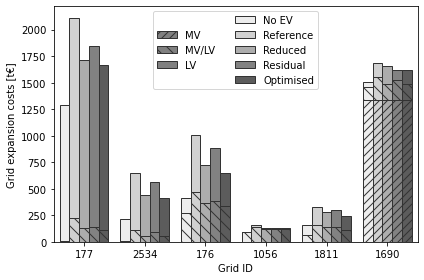

In [60]:
colors=sns.color_palette('Greys')[0:6]
ax=sns.barplot(data=total_costs_plt, x=x_name, y=y_name, hue=hue_name, palette=colors, order=grid_ids, edgecolor=".2", linewidth=1)

sns.barplot(data=mvlv_costs_plt, x=x_name, y=y_name, hue=hue_name, palette=colors, order=grid_ids, hatch='\\\\', edgecolor=".2", linewidth=1)
sns.barplot(data=mv_costs_plt, x=x_name, y=y_name, hue=hue_name, palette=colors, order=grid_ids, hatch='///', edgecolor=".2", linewidth=1)
# handle legend
ax.legend_.remove()
circ0 = mpatches.Patch( facecolor='k', alpha=0.0, label=' ')
circ1 = mpatches.Patch( facecolor='grey', hatch='///',label='MV', edgecolor=".2", linewidth=1)
circ2= mpatches.Patch( facecolor='grey', hatch='\\\\',label='MV/LV', edgecolor=".2", linewidth=1)
circ3 = mpatches.Patch(facecolor='grey', label='LV', edgecolor=".2", linewidth=1)
circ4 = mpatches.Patch( facecolor=colors[0], label='No EV', edgecolor=".2", linewidth=1)
circ5= mpatches.Patch( facecolor=colors[1], label='Reference', edgecolor=".2", linewidth=1)
circ6 = mpatches.Patch(facecolor=colors[2], label='Reduced', edgecolor=".2", linewidth=1)
circ7 = mpatches.Patch(facecolor=colors[3], label='Residual', edgecolor=".2", linewidth=1)
circ8 = mpatches.Patch(facecolor=colors[4], label='Optimised', edgecolor=".2", linewidth=1)
ax.legend(handles = [circ0, circ1, circ2, circ3, circ0,circ4,circ5, circ6, circ7, circ8, ], 
          loc='best', ncol=2)
#plt.title('Total grid expansion costs')
plt.tight_layout()
plt.savefig('results/plots/reinforcement_absolute.png', dpi=300)

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


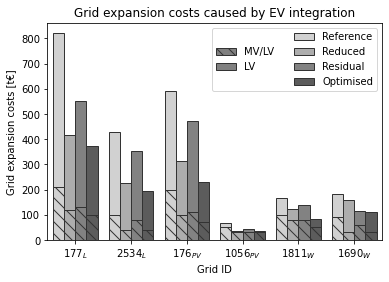

In [95]:
total_costs_diff_plt = total_costs_plt.loc[total_costs_plt[hue_name]!='no_ev']
mvlv_costs_diff_plt = mvlv_costs_plt.loc[mvlv_costs_plt[hue_name]!='no_ev']
for grid_id in grid_ids:
    total_costs_diff_plt.loc[total_costs_diff_plt[x_name]==grid_id, y_name] = total_costs_diff_plt.loc[total_costs_diff_plt[x_name]==grid_id, y_name].values-total_costs_plt.loc[(total_costs_plt[x_name]==grid_id)&(total_costs_plt[hue_name]=='no_ev'), y_name].values[0]
    mvlv_costs_diff_plt.loc[mvlv_costs_diff_plt[x_name]==grid_id, y_name] = mvlv_costs_diff_plt.loc[mvlv_costs_diff_plt[x_name]==grid_id, y_name].values-mvlv_costs_plt.loc[(mvlv_costs_plt[x_name]==grid_id)&(mvlv_costs_plt[hue_name]=='no_ev'), y_name].values[0]
ax=sns.barplot(data=total_costs_diff_plt, x=x_name, y=y_name, hue=hue_name, palette=colors[1:], order=grid_ids, edgecolor=".2", linewidth=1)
sns.barplot(data=mvlv_costs_diff_plt, x=x_name, y=y_name, hue=hue_name, palette=colors[1:], order=grid_ids, hatch='\\\\', edgecolor=".2", linewidth=1)
# handle legend
ax.legend_.remove()
circ1 = mpatches.Patch( facecolor='k', alpha=0.0, label=' ')
circ2= mpatches.Patch( facecolor='grey', hatch='\\\\',label='MV/LV', edgecolor=".2", linewidth=1)
circ3 = mpatches.Patch(facecolor='grey', label='LV', edgecolor=".2", linewidth=1)
circ4 = mpatches.Patch( facecolor=colors[0], label='No EV', edgecolor=".2", linewidth=1)
circ5= mpatches.Patch( facecolor=colors[1], label='Reference', edgecolor=".2", linewidth=1)
circ6 = mpatches.Patch(facecolor=colors[2], label='Reduced', edgecolor=".2", linewidth=1)
circ7 = mpatches.Patch(facecolor=colors[3], label='Residual', edgecolor=".2", linewidth=1)
circ8 = mpatches.Patch(facecolor=colors[4], label='Optimised', edgecolor=".2", linewidth=1)
ax.legend(handles = [circ1, circ2, circ3, circ1,circ5, circ6, circ7, circ8, ], 
          loc='best', ncol=2)#loc='upper center', bbox_to_anchor=(0.44, 1.23), 
ax.set_xticklabels(['$177_L$', '$2534_L$', '$176_{PV}$', '$1056_{PV}$', '$1811_W$', '$1690_W$'])
plt.title('Grid expansion costs caused by EV integration')
plt.savefig('results/plots/Reinforcement_costs_relative_SEST.png', dpi=300)

c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


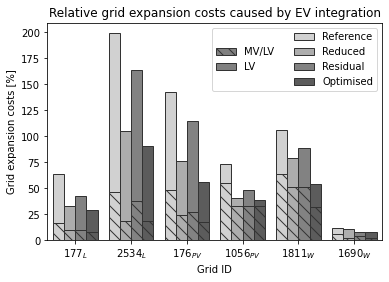

In [98]:
total_costs_diff_rel_plt = total_costs_plt.loc[total_costs_plt[hue_name]!='no_ev']
mvlv_costs_diff_rel_plt = mvlv_costs_plt.loc[mvlv_costs_plt[hue_name]!='no_ev']
for grid_id in grid_ids:
    total_costs_diff_rel_plt.loc[total_costs_diff_plt[x_name]==grid_id, y_name] = total_costs_diff_plt.loc[total_costs_diff_plt[x_name]==grid_id, y_name].values/total_costs_plt.loc[(total_costs_plt[x_name]==grid_id)&(total_costs_plt[hue_name]=='no_ev'), y_name].values[0]*100
    mvlv_costs_diff_rel_plt.loc[mvlv_costs_diff_plt[x_name]==grid_id, y_name] = mvlv_costs_diff_plt.loc[mvlv_costs_diff_plt[x_name]==grid_id, y_name].values/total_costs_plt.loc[(total_costs_plt[x_name]==grid_id)&(total_costs_plt[hue_name]=='no_ev'), y_name].values[0]*100
ax=sns.barplot(data=total_costs_diff_rel_plt, x=x_name, y=y_name, hue=hue_name, palette=colors[1:], order=grid_ids, edgecolor=".2", linewidth=1)
sns.barplot(data=mvlv_costs_diff_rel_plt, x=x_name, y=y_name, hue=hue_name, palette=colors[1:], order=grid_ids, hatch='\\\\', edgecolor=".2", linewidth=1)
# handle legend
ax.legend_.remove()
circ1 = mpatches.Patch( facecolor='k', alpha=0.0, label=' ')
circ2= mpatches.Patch( facecolor='grey', hatch='\\\\',label='MV/LV', edgecolor=".2", linewidth=1)
circ3 = mpatches.Patch(facecolor='grey', label='LV', edgecolor=".2", linewidth=1)
circ4 = mpatches.Patch( facecolor=colors[0], label='No EV', edgecolor=".2", linewidth=1)
circ5= mpatches.Patch( facecolor=colors[1], label='Reference', edgecolor=".2", linewidth=1)
circ6 = mpatches.Patch(facecolor=colors[2], label='Reduced', edgecolor=".2", linewidth=1)
circ7 = mpatches.Patch(facecolor=colors[3], label='Residual', edgecolor=".2", linewidth=1)
circ8 = mpatches.Patch(facecolor=colors[4], label='Optimised', edgecolor=".2", linewidth=1)
ax.legend(handles = [circ1, circ2, circ3, circ1,circ5, circ6, circ7, circ8, ], 
          loc='best', ncol=2)#loc='upper center', bbox_to_anchor=(0.44, 1.23), 
ax.set_xticklabels(['$177_L$', '$2534_L$', '$176_{PV}$', '$1056_{PV}$', '$1811_W$', '$1690_W$'])
plt.ylabel('Grid expansion costs [%]')
plt.title('Relative grid expansion costs caused by EV integration')
plt.savefig('results/plots/Reinforcement_costs_relative_percent_SEST.png', dpi=300)

In [115]:
total_costs_diff_rel = pd.DataFrame(index=grid_ids, columns=['dumb', 'reduced', 'residual', 'optimised'])
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        total_costs_diff_rel.loc[grid_id, strategy] = total_costs_diff_rel_plt.loc[(total_costs_diff_rel_plt[x_name]==grid_id)&(total_costs_diff_rel_plt[hue_name]==strategy), y_name].values[0]
total_costs_diff_rel

,dumb,reduced,residual,optimised
177,63.5556,32.3249,42.7795,28.9529
2534,199.216,104.666,163.46,90.258
176,142.659,75.8769,114.264,55.9053
1056,73.3057,40.8531,48.3473,38.8635
1811,105.883,78.5055,88.8104,53.9264
1690,12.0042,10.4907,7.54152,7.45378


In [116]:
total_costs_diff_relative = pd.DataFrame()
for strategy in ['reduced', 'residual', 'optimised']:
    total_costs_diff_relative[strategy] = total_costs_diff_rel[strategy]/total_costs_diff_rel['dumb']*100
total_costs_diff_relative

,reduced,residual,optimised
177,50.8607,67.3103,45.5553
2534,52.5392,82.0517,45.3067
176,53.1876,80.0958,39.1881
1056,55.7298,65.953,53.0157
1811,74.1433,83.8756,50.93
1690,87.392,62.8239,62.093


c:\users\aheider\.conda\envs\edisgo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


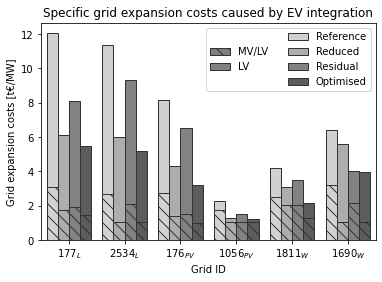

In [121]:
# plot specific reinforcement costs per installed kW
total_costs_specific = pd.DataFrame(index=grid_ids, columns=['dumb', 'reduced', 'residual', 'optimised'])
for grid_id in grid_ids:
    
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        total_costs_specific
total_specific_costs_diff_plt = total_costs_plt.loc[total_costs_plt[hue_name]!='no_ev']
mvlv_specific_costs_diff_plt = mvlv_costs_plt.loc[mvlv_costs_plt[hue_name]!='no_ev']
for grid_id in grid_ids:
    cps = pd.read_csv(r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\dumb\topology\charging_points.csv'.format(grid_id))
    installed_capacity = cps.p_nom.sum()
    total_specific_costs_diff_plt.loc[total_costs_diff_plt[x_name]==grid_id, y_name] = (total_costs_diff_plt.loc[total_costs_diff_plt[x_name]==grid_id, y_name].values)/installed_capacity
    mvlv_specific_costs_diff_plt.loc[mvlv_costs_diff_plt[x_name]==grid_id, y_name] = (mvlv_costs_diff_plt.loc[mvlv_costs_diff_plt[x_name]==grid_id, y_name].values)/installed_capacity
ax=sns.barplot(data=total_specific_costs_diff_plt, x=x_name, y=y_name, hue=hue_name, palette=colors[1:], order=grid_ids, edgecolor=".2", linewidth=1)
sns.barplot(data=mvlv_specific_costs_diff_plt, x=x_name, y=y_name, hue=hue_name, palette=colors[1:], order=grid_ids, hatch='\\\\', edgecolor=".2", linewidth=1)
# handle legend
ax.legend_.remove()
circ1 = mpatches.Patch( facecolor='k', alpha=0.0, label=' ')
circ2= mpatches.Patch( facecolor='grey', hatch='\\\\',label='MV/LV', edgecolor=".2", linewidth=1)
circ3 = mpatches.Patch(facecolor='grey', label='LV', edgecolor=".2", linewidth=1)
circ4 = mpatches.Patch( facecolor=colors[0], label='No EV', edgecolor=".2", linewidth=1)
circ5= mpatches.Patch( facecolor=colors[1], label='Reference', edgecolor=".2", linewidth=1)
circ6 = mpatches.Patch(facecolor=colors[2], label='Reduced', edgecolor=".2", linewidth=1)
circ7 = mpatches.Patch(facecolor=colors[3], label='Residual', edgecolor=".2", linewidth=1)
circ8 = mpatches.Patch(facecolor=colors[4], label='Optimised', edgecolor=".2", linewidth=1)
ax.legend(handles = [circ1, circ2, circ3, circ1,circ5, circ6, circ7, circ8, ], 
          loc='best', ncol=2)#loc='upper center', bbox_to_anchor=(0.44, 1.23), 
ax.set_xticklabels(['$177_L$', '$2534_L$', '$176_{PV}$', '$1056_{PV}$', '$1811_W$', '$1690_W$'])
plt.title('Specific grid expansion costs caused by EV integration')
plt.ylabel('Grid expansion costs [t€/MW]')
plt.savefig('results/plots/Reinforcement_costs_specific_SEST.png', dpi=300)

In [122]:
specific_costs = pd.DataFrame(index=grid_ids, columns=['dumb', 'reduced', 'residual', 'optimised'])
for grid_id in grid_ids:
    for strategy in ['dumb', 'reduced', 'residual', 'optimised']:
        specific_costs.loc[grid_id, strategy] = total_specific_costs_diff_plt.loc[(total_costs_diff_rel_plt[x_name]==grid_id)&(total_costs_diff_rel_plt[hue_name]==strategy), y_name].values[0]
specific_costs

,dumb,reduced,residual,optimised
177,12.0613,6.13446,8.11849,5.49455
2534,11.3848,5.98149,9.34143,5.15808
176,8.14548,4.33239,6.52419,3.19205
1056,2.29575,1.27942,1.51412,1.21711
1811,4.19386,3.10947,3.51763,2.13593
1690,6.40664,5.59889,4.0249,3.97808
